## Integrated Project: Understanding Maji Ndogo's agriculture

# Introduction

Hey there, I'm glad you're on board for the Maji Ndogo project AGAIN! Let me walk you through what we're up against and how we'll tackle it.

As you know, we're in an ambitious project aimed at automating farming in Maji Ndogo, a place with diverse and challenging agricultural landscapes. Before we dive into the 'how' of farming, we need to figure out the 'where' and 'what'. It's not just about deploying technology; it's about making informed decisions on where to plant specific crops, considering factors like rainfall, soil type, climate, and many others.

Our analysis is the groundwork for this entire automation project. We have an array of variables like soil fertility, climate conditions, and geographical data. By understanding these elements, we can recommend the best locations for different crops. It's a bit like solving a complex puzzle – each piece of data is crucial to seeing the bigger picture.

We'll start by importing our dataset into a DataFrame. It is currently in an SQLite database, and split into tables. Unlike Power BI or SQL, data analysis in Python happens in a single table. So we will have to brush off those dusty SQL skills to get the data imported. Expect a bit of a mess in the data – it's part of the challenge. We need to clean it up and maybe reshape it to make sense of it. It's like sorting out the tools and materials we need and getting rid of what we don't.

Here's where the real fun begins. We'll dive deep into the data, looking for patterns, and correlations. Each clue in the data leads us closer to understanding the best farming practices for Maji Ndogo. I'll be relying on your skills and insights. We'll be working through these steps together, discussing our findings and strategies.

Let's gear up and get ready to make a real difference in Maji Ndogo. Ready to get started? Let's dive into our data and see what stories it has to tell us.

Sanaa.

In [1]:
import pandas as pd # importing the Pandas package with an alias, pd
from sqlalchemy import create_engine, text # Importing the SQL interface. If this fails, run !pip install sqlalchemy in another cell.

# Create an engine for the database
engine = create_engine('sqlite:///Maji_Ndogo_farm_survey_small.db') 

C:\Users\hp\AppData\Local\Temp\ipykernel_12252\1350572139.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # importing the Pandas package with an alias, pd


In [2]:
with engine.connect() as connection:
    result = connection.execute(text("SELECT name FROM sqlite_master WHERE type='table';"))
    for row in result:
        print(row)

('geographic_features',)
('weather_features',)
('soil_and_crop_features',)
('farm_management_features',)


Next, we'll write an SQL query to join our tables. Combine all of the tables into a single query, using `Field_ID`.

In [3]:
sql_query = """
SELECT *
FROM geographic_features
INNER JOIN weather_features ON geographic_features.Field_ID = weather_features.Field_ID
INNER JOIN soil_and_crop_features ON geographic_features.Field_ID = soil_and_crop_features.Field_ID
INNER JOIN farm_management_features ON geographic_features.Field_ID = farm_management_features.Field_ID;

"""

In [4]:
# Create a connection object
with engine.connect() as connection:
    
    # Use Pandas to execute the query and store the result in a DataFrame
    result = connection.execute(sql_query)
    MD_agric_df = pd.DataFrame(result.fetchall(), columns=result.keys())

In [5]:
MD_agric_df

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Field_ID,Rainfall,Min_temperature_C,Max_temperature_C,...,Field_ID,Soil_fertility,Soil_type,pH,Field_ID,Pollution_level,Plot_size,Crop_type,Annual_yield,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,40734,1125.2,-3.1,33.1,...,40734,0.62,Sandy,6.169393,40734,8.526684e-02,1.3,0.751354,cassava,0.577964
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,30629,1450.7,-3.9,30.6,...,30629,0.64,Volcanic,5.676648,30629,3.996838e-01,2.2,1.069865,cassava,0.486302
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,39924,2208.9,-1.8,28.4,...,39924,0.69,Volcanic,5.331993,39924,3.580286e-01,3.4,2.208801,tea,0.649647
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,5754,328.8,-5.8,32.2,...,5754,0.54,Loamy,5.328150,5754,2.866871e-01,2.4,1.277635,cassava,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,14146,785.2,-2.5,31.0,...,14146,0.72,Sandy,5.721234,14146,4.319027e-02,1.5,0.832614,wheat,0.555076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,11472,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,11472,885.7,-4.3,33.4,...,11472,0.61,Sandy,5.741063,11472,3.286828e-01,1.1,0.609930,potato,0.554482
5650,19660,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,19660,501.1,-4.8,32.1,...,19660,0.54,Sandy,5.445833,19660,1.602583e-01,8.7,3.812289,maize,0.438194
5651,41296,670.77900,-14.472861,-6.110221,Rural_Hawassa,7.636470,41296,1586.6,-3.8,33.4,...,41296,0.64,Volcanic,5.385873,41296,8.221326e-09,2.1,1.681629,tea,0.800776
5652,33090,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,33090,1272.2,-6.2,34.6,...,33090,0.63,Silt,5.562508,33090,6.917245e-10,1.3,0.659874,cassava,0.507595


Note that there are a couple of `Field_ID` columns in our DataFrame that we need to remove since we're not interested in particular farms for now.

In [6]:
# Drop all columns named 'Field_ID'.
MD_agric_df.drop(columns = 'Field_ID', inplace = True)

# Data cleanup

I noticed some errors in the data. Here's what I picked up:

1. There are some swapped column names. Please ensure to use the correct name. 

2. Some of the crop types contain spelling errors.

3.  The `Elevation` column contains some negative values, which are not plausible, so change these to positive values.

In [7]:
# Swapped column names
correct_column_names = {
    'Crop_type': 'Annual_yield',
    'Annual_yield': 'Crop_type',
}

MD_agric_df.rename(columns=correct_column_names, inplace=True)

# Spelling errors
spelling_err = {
    'cassaval':'cassava',
    'teaa':'tea',
    'wheatn':'wheat',
    'wheat ':'wheat',
    'cassava ':'cassava',
    'tea ':'tea'
}

MD_agric_df.replace({'Crop_type': spelling_err}, inplace=True)

# Negative values
MD_agric_df['Elevation'] = MD_agric_df['Elevation'].abs()

# Analysis

##  1: Uncovering crop preferences

Now that we have our data ready, let's delve into understanding where different crops are grown in Maji Ndogo. The initial step is to focus on tea, a key crop in Maji Ndogo. We need to determine the optimal conditions for its growth. By analyzing data related to elevation, rainfall, and soil type specifically for tea plantations, we'll start to paint a picture of where our farming systems could thrive.


I create a function that includes only tea fields and returns a tuple with the mean `Rainfall` and the mean `Elevation`. The function should input the full DataFrame, a string value for the crop type to filter by, and output a tuple with rainfall and elevation.


In [9]:
def explore_crop_distribution(df,crop_filter):
    
    crop_df = df[df['Crop_type'] == crop_filter]
    
    if crop_df.empty:
        print(f"No data available for {crop_filter} in the DataFrame.")
        return None
    
    mean_rainfall = crop_df['Rainfall'].mean()
    mean_elevation = crop_df['Elevation'].mean()
    
    return mean_rainfall, mean_elevation

In [10]:
explore_crop_distribution(MD_agric_df, "tea")

(1534.5079956188388, 775.208667535597)

In [11]:
explore_crop_distribution(MD_agric_df, "wheat")

(1010.2859910581222, 595.8384148002981)

##  2: Finding fertile grounds


With insights into tea cultivation, let's broaden our horizons. Fertile soil is the bedrock of successful farming. By grouping our data by location and soil type, we'll pinpoint where the most fertile soils in Maji Ndogo are. These fertile zones could be prime candidates for diverse crop cultivation, maximising our yield.

We’ll group our data by soil type to see where the most fertile grounds are. This information will be vital for deciding where to deploy our farming technology.

I create a function that groups the data by `Soil_type`, and returns the `Soil_fertility`.

In [12]:
def analyse_soil_fertility(df):
    
    result = df.groupby('Soil_type')['Soil_fertility'].mean()
    
    return result


In [13]:
analyse_soil_fertility(MD_agric_df)

Soil_type
Loamy       0.585868
Peaty       0.604882
Rocky       0.582368
Sandy       0.595669
Silt        0.652654
Volcanic    0.648894
Name: Soil_fertility, dtype: float64

## 3: Climate and geography analysis

Now, let's delve into how climate and geography influence farming. By understanding the relationship between factors like elevation, temperature, and rainfall with crop yields, we can identify the most suitable areas for different crops. This analysis is key to ensuring our automated systems are deployed in locations that will maximise their effectiveness.

I create a function that takes in a DataFrame and the column name, and groups the data by that column, and aggregates the data by the means of `Elevation`, `Min_temperature_C`, `Max_temperature_C`, and `Rainfall`, and outputs a DataFrame. 

In [14]:
def climate_geography_influence(df,column):
    columns_aggregate = ['Elevation', 'Min_temperature_C', 'Max_temperature_C', 'Rainfall']
    results = df.groupby(str(column))[columns_aggregate].mean()
    
    return results

In [15]:
climate_geography_influence(MD_agric_df, 'Crop_type')

,Elevation,Min_temperature_C,Max_temperature_C,Rainfall
Crop_type,,,,
banana,487.973572,-5.354344,31.988152,1659.905687
cassava,682.903008,-3.992113,30.902381,1210.543006
coffee,647.047734,-4.028007,30.855189,1527.265074
maize,680.596982,-4.497995,30.576692,681.010276
potato,696.313917,-4.375334,30.300608,660.289064
rice,352.858053,-6.610566,32.727170,1632.382642
tea,775.208668,-2.862651,29.950383,1534.507996
wheat,595.838415,-4.968107,30.973845,1010.285991


## 4: Advanced sorting techniques

Quite often it is better to improve the things you're good at than improving the things you're bad at. So the question is, which crop is the top performer in Maji Ndogo, and under what conditions does it perform well? 

To answer this, we need to:
1. Filter all the fields with an above-average `Standard_yield` (do you have flashbacks to SQL subqueries right now?).
2. Then group by <?> crop type, using `count()`.
3. Sort the values to get the top crop type on top.
4. Retrieve the name of the top index. See the hint below on how to do this. 

I create a function that takes a DataFrame as input, filters, groups and sorts, and outputs a string value of a crop type.

In [16]:
grouped_df = MD_agric_df.groupby("Soil_type").mean(numeric_only = True).sort_values(by="Elevation",ascending=False)
print(grouped_df.index[0])
grouped_df

Rocky


,Elevation,Latitude,Longitude,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,pH,Pollution_level,Plot_size,Annual_yield,Standard_yield
Soil_type,,,,,,,,,,,,,,
Rocky,892.665740,-4.115932,-4.774825,8.631688,841.874671,-2.425658,29.131579,13.352961,0.582368,5.239680,0.235317,4.431250,2.197934,0.497657
Volcanic,750.902092,-7.471007,-1.977809,10.883989,1630.504364,-2.993755,30.089992,13.548119,0.648894,4.915182,0.238390,4.228518,2.518344,0.596921
Sandy,743.456509,-4.886504,-4.993451,13.902178,797.665003,-3.821689,30.175496,13.176903,0.595669,5.652828,0.295577,3.527191,1.770793,0.504614
Loamy,552.383554,-4.577196,-3.715553,12.559178,724.785612,-5.620966,31.374717,12.876876,0.585868,5.670844,0.320841,3.567009,2.084702,0.579886
Peaty,467.291922,-10.635362,-5.611269,3.850355,1344.381176,-5.835294,32.032941,13.098824,0.604882,4.945214,0.088177,7.205294,3.265347,0.448361
Silt,424.196238,-11.138730,-6.258565,11.179052,1667.228365,-5.927452,32.306236,13.189392,0.652654,6.375260,0.064196,3.810418,1.865240,0.492600


In [17]:
def find_ideal_fields(df):
    above_average_yield = df[df['Standard_yield'] > df['Standard_yield'].mean()]
    grouped_df = above_average_yield.groupby('Crop_type').size().sort_values(ascending=False)
    return grouped_df.index[0]

In [18]:
find_ideal_fields(MD_agric_df)

'tea'

Now we know that tea is our most successful crop, we can look at what makes it successful.

Create a function that takes a DataFrame as input, and the type of crop, and filters the DataFrame using the following conditions:
1. Filter by crop type.

2. Select only rows that have above average `Standard_yield`.

3. Select only rows that have `Ave_temps` >= 12 but =< 15.

4. Have a `Pollution_level` lower than 0.0001.

In [19]:
def find_good_conditions(df, crop_type):
    crop_df = df[df['Crop_type'] == crop_type]
    above_average_yield = crop_df[crop_df['Standard_yield'] > crop_df['Standard_yield'].mean()]
    temp_condition = above_average_yield[(above_average_yield['Ave_temps'] >= 12) & (above_average_yield['Ave_temps'] <= 15)]

    
    final_filtered = temp_condition[temp_condition['Pollution_level'] < 0.0001]

    return final_filtered

In [20]:
find_good_conditions(MD_agric_df, "tea")

,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield
197,688.63477,-14.585503,-5.948055,Rural_Hawassa,2.506081,1569.9,-3.6,31.6,14.00,0.62,Volcanic,4.117729,1.007224e-08,10.4,7.484284,tea,0.719643
852,739.42730,-14.405275,-6.267883,Rural_Hawassa,7.132496,1687.9,-3.1,31.1,14.00,0.64,Volcanic,4.538485,7.108529e-09,2.1,1.664479,tea,0.792609
869,691.24520,-14.400770,-5.966074,Rural_Hawassa,11.563782,1640.5,-3.5,32.7,14.60,0.65,Volcanic,4.123869,1.691890e-08,3.0,2.219570,tea,0.739857
943,713.74615,-14.549458,-6.051661,Rural_Hawassa,14.432365,1604.0,-3.4,27.7,12.15,0.66,Volcanic,5.147911,7.575035e-09,0.7,0.554950,tea,0.792785
1293,648.13605,-14.297139,-6.146258,Rural_Hawassa,9.684363,1648.5,-3.8,29.5,12.85,0.65,Volcanic,5.154659,1.387864e-08,2.5,2.095446,tea,0.838179
1376,660.65173,-14.423298,-6.011120,Rural_Hawassa,7.688627,1603.4,-3.8,28.8,12.50,0.64,Volcanic,4.330087,1.364089e-08,3.4,2.648997,tea,0.779117
2010,527.61390,-14.161968,-6.731858,Rural_Hawassa,0.977717,1560.2,-5.1,33.3,14.10,0.61,Peaty,5.092398,1.150044e-08,9.3,6.679613,tea,0.718238
2278,667.37920,-14.382747,-6.632757,Rural_Hawassa,2.563133,1625.9,-3.8,31.4,13.80,0.62,Volcanic,4.844913,4.868797e-09,14.3,11.751984,tea,0.821817
3445,678.59955,-14.648583,-6.083194,Rural_Hawassa,16.919823,1531.3,-3.8,28.4,12.30,0.66,Volcanic,4.828436,4.663686e-09,2.0,1.580439,tea,0.790220
3568,684.76980,-14.261093,-6.267883,Rural_Hawassa,21.928755,1689.2,-3.5,29.2,12.85,0.69,Volcanic,4.815771,1.248680e-08,0.6,0.499929,tea,0.833216


## Understand relationship between variables

<Axes: xlabel='Crop_type'>

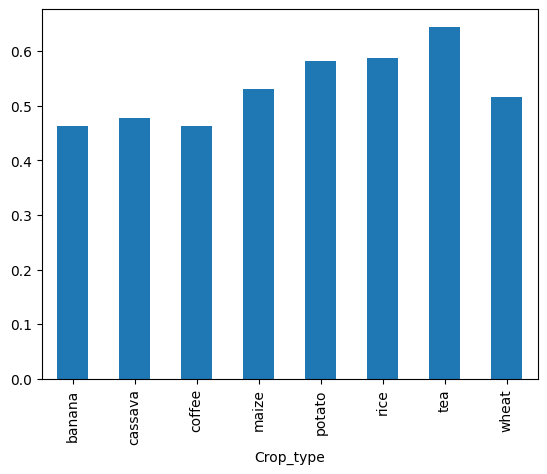

In [21]:
MD_agric_df.groupby('Crop_type')['Standard_yield'].mean().plot(kind='bar')